# Credibility Checker - A foray into detecting fake news and separating it from real news

### Overview: 
In this practical application, we answer the question 'What is the most effective model for determining whether a news article is real or fake?'

Following CRISP-DM method.

### Motivation:
NEWS has always been a critical source of truth and information of world events that affect everybody. In an era of widespread misinformation, distinguishing real news from fake is critical to maintaining an informed public. This project is an initial foray into classifying information vs disinformation by applying machine learning to classify news credibility, offering practical insights into automated fact-checking.

### The Data:

**Source** : The data is taken from Kaggle 'fake-and-real-news-dataset' (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data).


The dataset contains 2 separate CSV files one for real and one for fake news articles. The news articles are collected between years 2016 and 2017.
Both sheets contain 4 columns: Title, Text, Subject and Date.


Dataset columns:

* Title: title of news article
* Text: body text of news article
* Subject: subject of news article
* Date: publish date of news article



### Read in the Data


In [521]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore")

In [523]:
real_df = pd.read_csv("data/True.csv")
fake_df = pd.read_csv("data/Fake.csv")

In [524]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [525]:
real_df.shape

(21417, 4)

In [526]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [531]:
fake_df.shape

(23481, 4)

In [533]:
# label the data as True (1) or False (0)
real_df['label']=1
fake_df['label']=0

In [535]:
real_df.info()
# no null values in real dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [537]:
fake_df.info()
# no null values in fake dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [539]:
# Both datasets have same columns so we can combine them into single dataset
news = pd.concat([real_df,fake_df],ignore_index=True)

# Shuffle the dataset
news = news.sample(frac=1).reset_index(drop=True)

In [541]:
news

,title,text,subject,date,label
0,Saudi Arabia welcomes new U.S. strategy toward...,DUBAI (Reuters) - Saudi Arabia welcomed the ne...,worldnews,"October 13, 2017",1
1,Thousands of Indonesians join anti-Myanmar ral...,"JAKARTA (Reuters) - Thousands of Indonesians, ...",worldnews,"September 6, 2017",1
2,S.African prosecutors extend deadline for Zuma...,JOHANNESBURG (Reuters) - South Africa s Nation...,worldnews,"December 11, 2017",1
3,Russia's Putin says hard to hold dialogue with...,MOSCOW (Reuters) - It is hard to hold a dialog...,politicsNews,"October 12, 2016",1
4,Trump tells China's Xi he believes there is so...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 9, 2017",1
...,...,...,...,...,...
44893,Here’s The Most Scathing Indictment Yet Of Th...,There are too many people in our society who f...,News,"June 15, 2016",0
44894,Austria election victor calls for end to Turke...,BRUSSELS (Reuters) - Austria s likely next cha...,worldnews,"October 19, 2017",1
44895,Thai hotels booked up ahead of funeral of reve...,BANGKOK (Reuters) - Hotels in Bangkok s bustli...,worldnews,"October 16, 2017",1
44896,Geraldo Rivera: GOP Will Only Nominate A ‘Cra...,Those of us on the left have long said that th...,News,"May 1, 2016",0


In [543]:
news.shape

(44898, 5)

In [545]:
# Clean up the duplicates
news = news.drop_duplicates()
news.shape

(44689, 5)

In [546]:
# Drop the unnecessary columns:
# We are focusing on the Natural Language aspect of the dataset so the date columns is of no use for the scope this project
news.drop(columns = ['date'],inplace = True)
news.shape

(44689, 4)

In [549]:
# Find out if there are any null values
news.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [551]:
# drop any duplicates
news = news.drop_duplicates()
news.shape

(44685, 4)

In [553]:
# Make sure that the columns are readable text and not some garbage
news['text']=news['text'].astype(str)
news

,title,text,subject,label
0,Saudi Arabia welcomes new U.S. strategy toward...,DUBAI (Reuters) - Saudi Arabia welcomed the ne...,worldnews,1
1,Thousands of Indonesians join anti-Myanmar ral...,"JAKARTA (Reuters) - Thousands of Indonesians, ...",worldnews,1
2,S.African prosecutors extend deadline for Zuma...,JOHANNESBURG (Reuters) - South Africa s Nation...,worldnews,1
3,Russia's Putin says hard to hold dialogue with...,MOSCOW (Reuters) - It is hard to hold a dialog...,politicsNews,1
4,Trump tells China's Xi he believes there is so...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,1
...,...,...,...,...
44893,Here’s The Most Scathing Indictment Yet Of Th...,There are too many people in our society who f...,News,0
44894,Austria election victor calls for end to Turke...,BRUSSELS (Reuters) - Austria s likely next cha...,worldnews,1
44895,Thai hotels booked up ahead of funeral of reve...,BANGKOK (Reuters) - Hotels in Bangkok s bustli...,worldnews,1
44896,Geraldo Rivera: GOP Will Only Nominate A ‘Cra...,Those of us on the left have long said that th...,News,0


### Understanding the Data



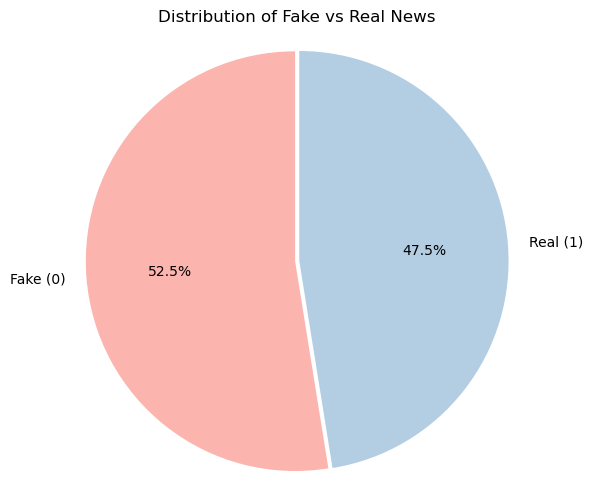

In [556]:
# Is the data balanced?
label_counts = news['label'].value_counts()
labels = ['Fake (0)', 'Real (1)']
sizes = [label_counts[0], label_counts[1]]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        explode=(0.02, 0), colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Fake vs Real News')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.savefig("images/fake_vs_real_distribution.png")
plt.show()

##### ==> Real vs Fake distribution is almost the same (looks like the differnece is intentional). Means the Data is balanced.

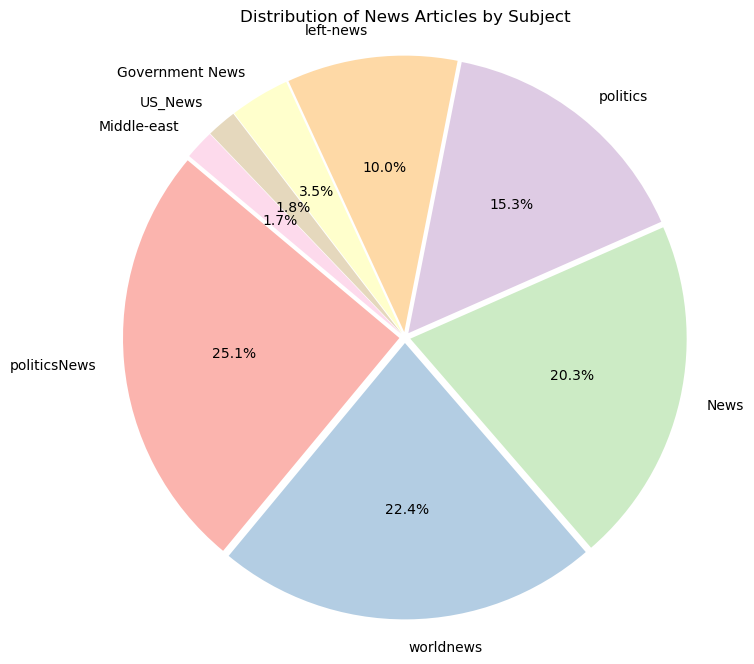

In [559]:
# Count the number of articles per subject
subject_counts = news['subject'].value_counts()

# Create an explode array to slightly separate all slices
explode = [0.02] * len(subject_counts)  # small offset for each slice

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, explode=explode,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of News Articles by Subject')
plt.axis('equal')  # Ensures pie chart is a circle
plt.savefig("images/news_distribution_by_subject.png")
plt.show()

##### ==> Majority of the articles are related to politics or world events.
##### ==> Distribution of news articles by Subject is skewed. So we will ignore it to train the models.

In [562]:
news.drop(columns=['subject'], inplace=True)

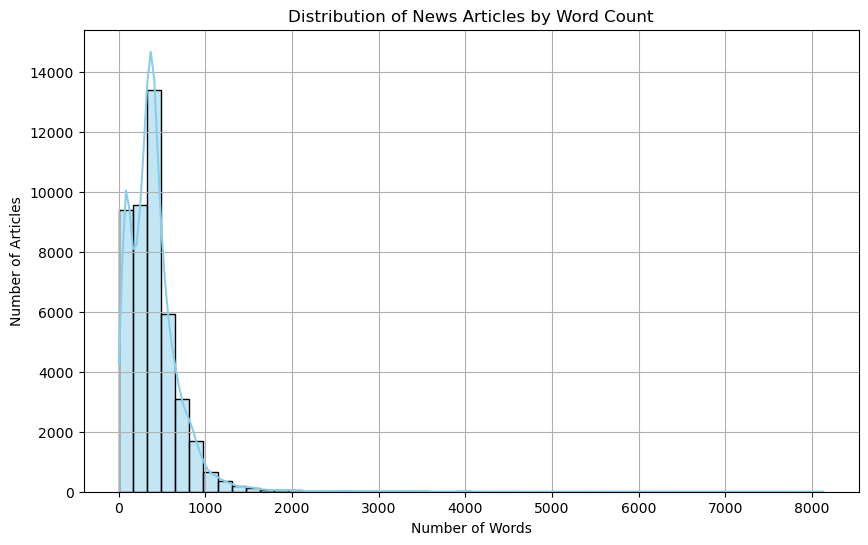

In [564]:
news['text_length']=news['text'].apply(lambda a : len(a.split()))


plt.figure(figsize=(10, 6))
sns.histplot(news['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of News Articles by Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.savefig("images/news_distribution_by_word_count.png")
plt.show()

##### ==> There are few new articles longer than 1000 words.

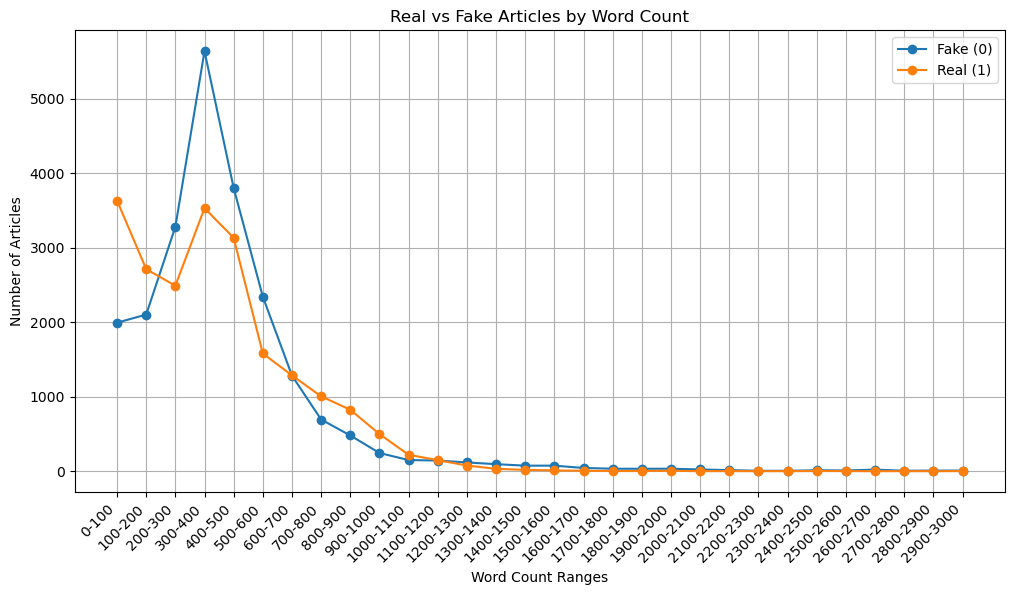

In [567]:
# Limit bin range up to 3000 words
max_length = 3000
bin_edges = range(0, max_length + 100, 100)  # bins of width 100
news['length_bin'] = pd.cut(news['text_length'], bins=bin_edges)

# Group by bin and label
length_dist = news.groupby(['length_bin', 'label']).size().unstack(fill_value=0)

# Prepare x-axis labels as midpoints of the bins
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in length_dist.index]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(bin_labels, length_dist[0], label='Fake (0)', marker='o')
plt.plot(bin_labels, length_dist[1], label='Real (1)', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word Count Ranges')
plt.ylabel('Number of Articles')
plt.title('Real vs Fake Articles by Word Count')
plt.legend()
plt.grid(True)
plt.savefig("images/fake_vs_real_distribution_by_word_count.png")
plt.show()

# clean up the dataset after visualizations
news.drop(columns=['text_length'], inplace=True)
news.drop(columns=['length_bin'], inplace=True)

### Preprocessing the text

In [570]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [572]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/npatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/npatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/npatil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/npatil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [574]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [576]:
# Preprocess the text of the news articles. 
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text) # Split the text into and array of individual words

    words = [lemmatizer.lemmatize(word) for word in words] # reduces words to their dictionary form (lemma)

    clean_words = [word for word in words if word not in stop_words] # remove the stop words

    cleaned_text = ' '.join(clean_words) # make the array to be string again

    return cleaned_text

In [578]:
news['cleaned_text'] = news['text'].apply(process_text)

In [579]:
news.head(5)

,title,text,label,cleaned_text
0,Saudi Arabia welcomes new U.S. strategy toward...,DUBAI (Reuters) - Saudi Arabia welcomed the ne...,1,dubai reuters saudi arabia welcomed new policy...
1,Thousands of Indonesians join anti-Myanmar ral...,"JAKARTA (Reuters) - Thousands of Indonesians, ...",1,jakarta reuters thousand indonesian led islami...
2,S.African prosecutors extend deadline for Zuma...,JOHANNESBURG (Reuters) - South Africa s Nation...,1,johannesburg reuters south africa national pro...
3,Russia's Putin says hard to hold dialogue with...,MOSCOW (Reuters) - It is hard to hold a dialog...,1,moscow reuters hard hold dialogue current admi...
4,Trump tells China's Xi he believes there is so...,BEIJING (Reuters) - U.S. President Donald Trum...,1,beijing reuters president donald trump told ch...


#### Lets see if we can observe difference between most common words in fake and real articles

In [583]:
from wordcloud import WordCloud

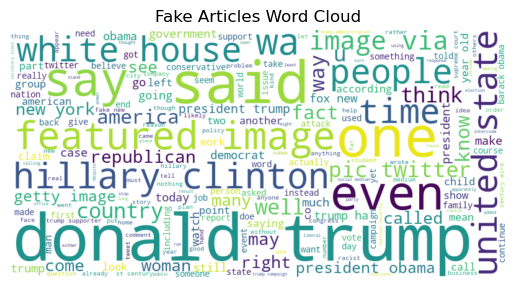

In [609]:
# word cloud for fake articles

fake_text=' '.join(news[news['label']==0]['cleaned_text'])
wc_fake=WordCloud(width=800,height=400,background_color='white').generate(fake_text)

plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake Articles Word Cloud")
plt.savefig("images/fake_word_cloud.png")
plt.show()

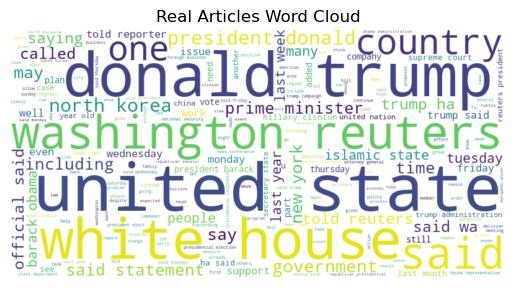

In [610]:
# word cloud for real articles

real_text=' '.join(news[news['label']==1]['cleaned_text'])
wc_real=WordCloud(width=800,height=400,background_color='white').generate(real_text)

plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real Articles Word Cloud")
plt.savefig("images/real_word_cloud.png")
plt.show()

### Split and Vectorize the data

In [627]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [629]:
# Split data
X = news['cleaned_text']
y = news['label']  # 0 = Fake, 1 = Real

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [631]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=20000)
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_test_tfidf = tfidf.transform(X_test)

### A Baseline Model

Before we build our first model, let's establish a baseline.

In [649]:
from sklearn.pipeline import make_pipeline

In [651]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [653]:
# Train the model
nb_pipeline = make_pipeline(
    tfidf,
    MultinomialNB()
)

nb_start = time.time()
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)
nb_end = time.time()

nb_runtime = nb_end - nb_start
print(f"Naive Bayes Model runtime: {nb_runtime:.2f} seconds")

Naive Bayes Model runtime: 2.65 seconds


In [655]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9288351795904666


In [657]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Fake", "Real"]))


Classification Report:
               precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      4751
        Real       0.92      0.92      0.92      4186

    accuracy                           0.93      8937
   macro avg       0.93      0.93      0.93      8937
weighted avg       0.93      0.93      0.93      8937



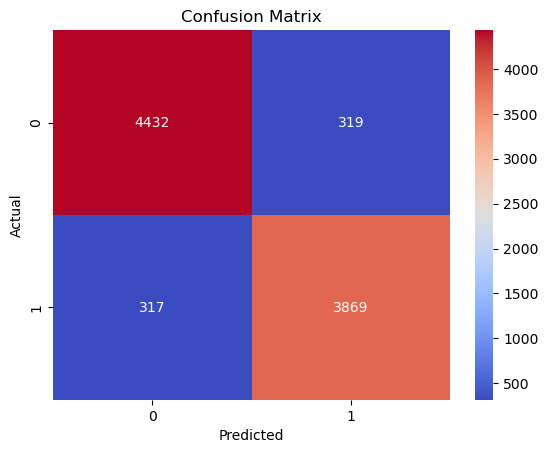

In [643]:
# Confustion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("images/naive_bayes_confusion_matrix.png")
plt.show()